# Data Processing

This section deals with data processing 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('dataForTrainingLinear.txt', sep = " ", header = None)
df.head()

,0,1,2
0,101,1.7,641.48
1,120,2.3,722.30
2,115,4.0,569.43
3,123,2.8,706.34
4,98,1.2,657.44


In [3]:
df.insert(0, -1, pd.Series(1, index=df.index)) # insert coefficent for the bias term

In [4]:
df.head()

,-1,0,1,2
0,1,101,1.7,641.48
1,1,120,2.3,722.30
2,1,115,4.0,569.43
3,1,123,2.8,706.34
4,1,98,1.2,657.44


In [5]:
X_train = df.iloc[:, :-1] # independent variables
Y_train = df.iloc[:, -1] # dependent variable
len_X_vars = len(X_train.columns)
X_train.head()
Y_train.head()

0    641.48
1    722.30
2    569.43
3    706.34
4    657.44
Name: 2, dtype: float64

In [6]:
# weights for the dependent variables
W = np.array([0] * len_X_vars)
train_len = len(X_train) # length of training data 
print(train_len)

50


# Multivariate Linear Regression

This section implements linear regression

## Training

In [7]:
def hypothesis(W, X):
    return W * X

In [8]:
def cost(X, Y, W):
    Y1 = hypothesis(W, X)
    Y1 = np.sum(Y1, axis=1) # sum the values in all three columns of every row
    len_data = len(X)
    return sum((Y1 - Y) ** 2)/ (2 * len_data)

In [9]:
def grad_descent(X, Y, W, epochs, l_rate): # takes independent vars, dependent vars, initial sets of weights, epochs and learning rate
    costs = list() # cost at every 100000 iteration
    for epoch in range(epochs):
        Y1 = hypothesis(W, X) 
        Y1 = np.sum(Y1, axis=1) # hypothesis calculation of all points 
        for i in range(len(W)):
            W[i] = W[i] - l_rate * (1 / train_len) * (sum((Y1 - Y)* X_train.iloc[:, i]))
        if (epoch / 100000) in range(0, 15):
            costs.append(cost(X, Y, W))
            print(f"weights at epoch {epoch} are {W}")
    print(f"final weights are {W}")
    return (W, costs)

In [10]:
W, cost_testing = grad_descent(X_train, Y_train, np.zeros(3), 1500000, 0.00015) # update the weights according to optimal weights#
#W = np.array([79.46370204, 6.76193964, -72.38088259])

weights at epoch 0 are [0.06016791 6.30702078 0.24828245]
weights at epoch 100000 are [ 46.32989508   7.08938742 -72.75988293]
weights at epoch 200000 are [ 65.48738442   6.90006184 -72.5407504 ]
weights at epoch 300000 are [ 73.56835224   6.82020096 -72.44831642]
weights at epoch 400000 are [ 76.97704739   6.78651422 -72.40932614]
weights at epoch 500000 are [ 78.41489529   6.77230457 -72.39287934]
weights at epoch 600000 are [ 79.02140497   6.76631068 -72.38594179]
weights at epoch 700000 are [ 79.27724148   6.76378235 -72.38301541]
weights at epoch 800000 are [ 79.38515784   6.76271586 -72.38178102]
weights at epoch 900000 are [ 79.43067887   6.76226599 -72.38126032]
weights at epoch 1000000 are [ 79.44988045   6.76207623 -72.38104069]
weights at epoch 1100000 are [ 79.45798001   6.76199619 -72.38094804]
weights at epoch 1200000 are [ 79.46139655   6.76196242 -72.38090896]
weights at epoch 1300000 are [ 79.46283771   6.76194818 -72.38089248]
weights at epoch 1400000 are [ 79.4634456

# Testing

## Data Processing for Testing

In [11]:
# perform testing given the optimal weights 
df = pd.read_csv('dataForTestingLinear.txt', sep = " ", header = None)
df.head()

,0,1,2
0,93,0.78,637.07
1,104,3.82,494.08
2,110,4.27,502.26
3,69,5.20,166.46
4,80,1.22,521.05


In [12]:
df.insert(0, -1, pd.Series(1, index=df.index)) # insert coefficent for the bias term

In [13]:
df.head()

,-1,0,1,2
0,1,93,0.78,637.07
1,1,104,3.82,494.08
2,1,110,4.27,502.26
3,1,69,5.20,166.46
4,1,80,1.22,521.05


In [14]:
X_test = df.iloc[:, :-1] # all the rows except the last row 
Y_test = df.iloc[:, -1] # only the last row 
test_len = len(X_test)
print(test_len) 
X_test.head()
Y_test.head()

10


0    637.07
1    494.08
2    502.26
3    166.46
4    521.05
Name: 2, dtype: float64

In [15]:
# Calculate the hypothesis (predicted value) for each data point in testing set 
prediction = np.sum(hypothesis(W, X_test), axis=1)
prediction

0    651.867000
1    506.210453
2    514.210694
3    169.656948
4    532.114196
5    550.685566
6    544.001886
7    476.553463
8    354.990351
9    616.419539
dtype: float64

In [16]:
# find error on prediction
#cost_testing = cost(X_test, Y_test, W)
print(cost_testing)

[49610.3771565766, 33.50330670753511, 7.529547591299077, 2.9080324663087613, 2.085725538962252, 1.9394123355053141, 1.9133788037498518, 1.9087466532695698, 1.9079224539917385, 1.9077758040820598, 1.907749710640124, 1.9077450678298, 1.9077442417338488, 1.9077440947464441, 1.9077440685929599]


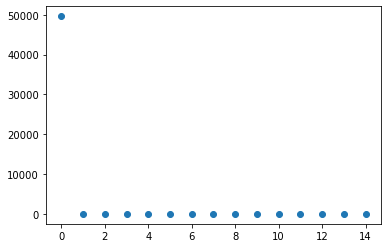

In [17]:
# find accuracy
# find graphs
# implement stochastic gradient descent 
plt.figure()
plt.scatter(x = list(range(0, 15)), y = cost_testing)
plt.show()

# Stochastic Gradient Descent

In [44]:
# implement stochastic gradient descent 
def stoch_grad_descent(X, Y, W, epochs, l_rate):
    costs = list()
    len_data = len(X)
    for epoch in range(epochs):
        Y1 = hypothesis(W, X)
        Y1 = np.sum(Y1, axis=1)
        # chose a point at random 
        point = X.iloc[random.randrange(50), :] # select a row from df at random
        # compute the weights next
        for i in range(len(W)):
            W[i] = W[i] - l_rate * (1 / len_data) * (sum((Y1 - Y)* point[i - 1]))
        if (epoch / 100000) in range(0, 15):
            costs.append(cost(X, Y, W))
            print(f"weights at epoch {epoch} are {W}")
    print(f"final weights are {W}")
    return (W, costs)

In [36]:
X_train.iloc[random.randrange(50), :][2-1]

3.7

In [45]:
W_stoch, costs_train_stoch = stoch_grad_descent(X_train, Y_train, np.zeros(3), 1500000, 0.00015)

weights at epoch 0 are [0.06016791 5.11427235 0.05535448]
weights at epoch 100000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 200000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 300000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 400000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 500000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 600000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 700000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 800000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 900000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 1000000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 1100000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 1200000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 1300000 are [0.04666782 3.9639796  0.01529101]
weights at epoch 1400000 are [0.04666782 3.9639796  0.01529101]
final weights are [0.04666782 3.9639796  0.01529101]
